In [382]:
#init 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = "./100pkt_parse.txt"
total_line = 618
#num_type = 3
num_type = 6

time = np.loadtxt(f,delimiter=',',usecols=[0],dtype=float)
p_type = np.loadtxt(f,delimiter=',',usecols=[1],dtype=str)
p_len = np.loadtxt(f,delimiter=',',usecols=[2],dtype=int)

k = 0;
for i in range(total_line):
    if p_type[i] == "MRd":
        k += p_len[i]
print(k);

k = 0;

for i in range(total_line):
    if p_type[i] == "CplD":
        k += p_len[i]
print(k);

2000
2000


In [383]:
print(time[0])
print(time[total_line-1])

6.448276
6.452317


In [384]:
for i in range(total_line):
    time[i] = int(time[i] * 1000000)
    time[i] = time[i] - 6000000
time

array([448276., 448282., 448283., 448284., 448285., 448286., 448287.,
       448288., 448295., 448301., 448305., 448307., 448356., 448361.,
       448362., 448363., 448364., 448365., 448366., 448367., 448368.,
       448369., 448370., 448376., 448389., 448391., 448392., 448394.,
       448407., 448409., 448411., 448413., 448413., 448420., 448424.,
       448429., 448439., 448441., 448442., 448449., 448495., 448500.,
       448501., 448502., 448503., 448504., 448511., 448517., 448522.,
       448528., 448530., 448531., 448537., 448540., 448586., 448590.,
       448592., 448593., 448594., 448595., 448596., 448597., 448598.,
       448599., 448599., 448606., 448613., 448618., 448621., 448622.,
       448633., 448635., 448640., 448645., 448647., 448648., 448653.,
       448657., 448659., 448660., 448672., 448673., 448678., 448684.,
       448685., 448686., 448692., 448696., 448697., 448698., 448711.,
       448712., 448717., 448723., 448724., 448725., 448731., 448735.,
       448735., 4487

In [385]:
# devide time by time unit
div_unit = 100

unit_time = [];
for i in range(total_line):
        unit_time.append(int(time[i]/div_unit))

In [386]:
# get a count of traffic by time unit

init_time = unit_time[0]
traffic_range = unit_time[total_line-1]%init_time + 1
#traffic_range = unit_time[total_line-1] - init_time
counter = list(range(traffic_range))

for i in range(traffic_range):
    counter[i] = 0;
    
for i in range(total_line):
    counter[unit_time[i]%init_time] += 1;

#for i in range(traffic_range):
 #   print(counter[i]);

In [387]:
cluster = np.ones((traffic_range,num_type),dtype={"names":("ptype","len"),"formats":("str","int")})

In [366]:
start = 0;

for i in range(traffic_range):
    for k in range(num_type):
        cluster[i][k][1] = 0;

for i in range(traffic_range):
    for k in range(counter[i]):
        offset = k + start;
        if p_type[offset] == "MWr":
            cluster[i][0][1] += p_len[offset]
        elif p_type[offset] == "MRd":
            cluster[i][1][1] += p_len[offset]
        elif p_type[offset] == "CplD":
            cluster[i][2][1] += p_len[offset]
    start += k;

In [388]:
start = 0;
offset = 0;
d_mrd = 4;
p_mrd = 16;
d_cpld = 4;
p_cpld = 16;

testp = 0;
for i in range(traffic_range):
    for k in range(num_type):
        cluster[i][k][1] = 0;

for i in range(traffic_range):
    for k in range(counter[i]):
        offset = k + start;
        
        if p_type[offset] == "MWr":
            if p_len[offset] == 2:
                cluster[i][0][1] += p_len[offset]
            elif p_len[offset] == 1:
                 cluster[i][1][1] += p_len[offset]
            else:
                print(offset)
                print("errrrrrrrrrroooooooooooooor!")
        elif p_type[offset] == "MRd":
            if p_len[offset] == d_mrd:
                cluster[i][2][1] += p_len[offset]
            elif p_len[offset] == p_mrd:
                cluster[i][3][1] += p_len[offset]
                testp +=p_len[offset];
        elif p_type[offset] == "CplD":
            if  p_len[offset] == d_cpld:
                cluster[i][4][1] += p_len[offset]
            elif p_len[offset] == p_cpld:
                cluster[i][5][1] += p_len[offset]
    start += counter[i]; 
    offset = 0;
    
testp

576
errrrrrrrrrroooooooooooooor!
587
errrrrrrrrrroooooooooooooor!
591
errrrrrrrrrroooooooooooooor!
596
errrrrrrrrrroooooooooooooor!
604
errrrrrrrrrroooooooooooooor!
613
errrrrrrrrrroooooooooooooor!


1600

In [389]:
traffic_range

42

<function matplotlib.pyplot.show(*args, **kw)>

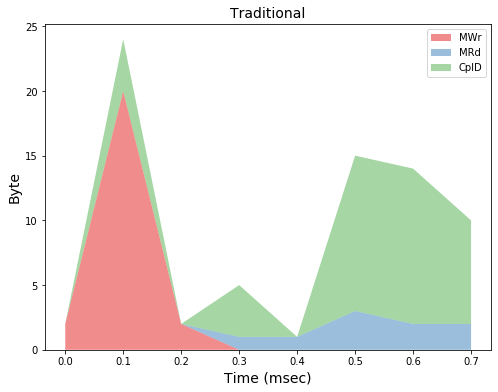

In [305]:
import seaborn as sns

# unit based on sec or msec
unit = 10
x_start = 0
x_tol = 1 / unit
x_end = 0.8
#x_end = (unit_time[total_line-1] - unit_time[0])/unit + x_tol*2

x = np.arange(x_start,x_end,x_tol)
y_mwr = np.arange(traffic_range)
y_mrd = np.arange(traffic_range)
y_cpid = np.arange(traffic_range)

labels = ["MWr","MRd","CpID"]

for i in range(traffic_range):
    y_mwr[i] = cluster[i][0][1];
    y_mrd[i] = cluster[i][1][1]; 
    y_cpid[i] = cluster[i][2][1];

pal = sns.color_palette("Set1")
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(x,y_mwr,y_mrd,y_cpid,labels=labels,colors=pal,alpha=0.5)

ax.set_xlabel("Time (msec)",size=14)
ax.set_ylabel("Byte",size=14)
ax.set_title("Traditional",size=14)
ax.legend(loc="best")
#plt.ylim([0,60])

plt.savefig("./stackg_pic/100pkt/01msec_4col.pdf",dpi=300) 

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

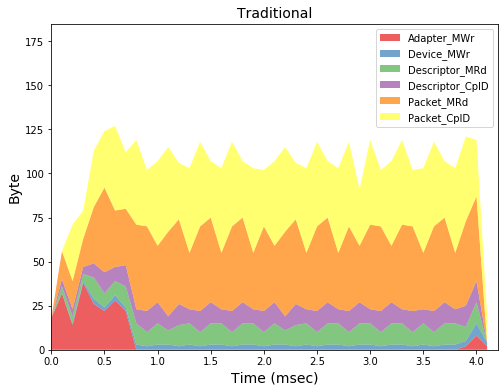

In [394]:
# 4color

import seaborn as sns

# unit based on sec or msec
unit = 10
x_start = 0
x_tol = 1 / unit
x_end = 4.2
#x_end = (unit_time[total_line-1] - unit_time[0])/unit + x_tol*2

x = np.arange(x_start,x_end,x_tol)
a_y_mwr = np.arange(traffic_range)
d_y_mwr = np.arange(traffic_range)
d_y_mrd = np.arange(traffic_range)
d_y_cpid = np.arange(traffic_range)
p_y_mrd = np.arange(traffic_range)
p_y_cpid = np.arange(traffic_range)


#labels = ["MWr","MRd","CpID"]
labels = ["Adapter_MWr","Device_MWr","Descriptor_MRd","Descriptor_CpID","Packet_MRd","Packet_CpID"]

for i in range(traffic_range):
   # y_mwr[i] = cluster[i][0][1]/1024;
    #y_mrd[i] = cluster[i][1][1]/1024; 
    #y_cpid[i] = cluster[i][2][1]/1024;
    a_y_mwr[i] = cluster[i][0][1];
    d_y_mwr[i] = cluster[i][1][1];
    d_y_mrd[i] = cluster[i][2][1]; 
    p_y_mrd[i] = cluster[i][3][1];
    d_y_cpid[i] = cluster[i][4][1]; 
    p_y_cpid[i] = cluster[i][5][1];

pal = sns.color_palette("Set1")
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(x,a_y_mwr,d_y_mwr,d_y_mrd,d_y_cpid,p_y_mrd,p_y_cpid,labels=labels,colors=pal,alpha=0.7)

ax.set_xlabel("Time (msec)",size=14)
ax.set_ylabel("Byte",size=14)
ax.set_title("Traditional",size=14)
ax.legend(loc="best")
plt.ylim([0,185])
plt.xlim(0.0, 4.20)     

plt.savefig("./stackg_pic/10pkt/01msec_4col_y200.png",dpi=300) 

plt.show